<a href="https://colab.research.google.com/github/cristianramirezrodriguez/UNBLaser/blob/main/HalfwavePlateExperiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Halfwave Plate Experiment

In this notebook we attempt to fit the function $F(\theta) = (A_1 \cos{\theta}+A_2\cos{2\theta})^2 + C$, where $\theta = x+\phi$ to our data which is in the form of a csv file with $x$ and $F(\theta)$ coordinates.

In [2]:
#pip install statements if necessary
#!pip install matplotlib
#!pip install pandas
!pip install lmfit
#!pip install os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00


In [3]:
#Import Statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lmfit as lm
import os
from typing import Callable

In [2]:
#Defining the fit function
def fit_func(x: np.ndarray, A1: float, A2: float, C: float, phi: float) -> np.ndarray:
    return (A1 * np.cos(x + phi) + A2 * np.cos(2 * x + phi)) ** 2 + C

In [5]:
#Fitting algorithm

def lmfit(x: np.ndarray, y: np.ndarray, title: str, dest_dir: str, params: lm.Parameters, func: Callable):
	"""Plot a general fit curve of a set of data"""

	ShowInitialGuess = True

	model  = lm.Model(func)

	# fit the curve to those parameters
	result = model.fit(y, params, x=x)

	# give a report on the parameters
	print(result.fit_report())
	# write the report into a text file
	with open(f"{dest_dir}\\{title}.txt", "w") as f:
		f.write(result.fit_report())


	fig = plt.figure(figsize=(7,5), constrained_layout=True)
	wratios, hratios = ([1], [1, 3])
	gs  = fig.add_gridspec(nrows=2, ncols=1, width_ratios=wratios, height_ratios=hratios)
	ax1 = fig.add_subplot(gs[1,0])
	ax0 = fig.add_subplot(gs[0,0], sharex=ax1)
	axs = [ax0, ax1]
	plt.setp(ax0.get_xticklabels(), visible=False)

	axs[0].set_ylabel(r'$y - f(x)$')
	axs[1].set_xlabel(r'Measured Position (radians)')
	axs[1].set_ylabel(r'Measured Power (mW)')

	axs[0].plot(x, y-result.best_fit, color='black', marker='.', linestyle='', label='Residuals')
	axs[1].plot(x, y, color='black', marker='.', linestyle='', label='Data')
	axs[1].plot(x, result.best_fit, color='crimson', marker='', linestyle='-', label='Best fit')

	if ShowInitialGuess:
		axs[1].plot(x, result.init_fit, color='royalblue', marker='', linestyle='-', label='Initial guess')

	for ax in axs:
		ax.legend(loc='best')
		ax.grid()

	plt.title(title)
	plt.savefig(f"{dest_dir}\\{title}.pdf", format="pdf")
	plt.close()

In [17]:
def main():
  df = pd.read_csv(r"aug_28.csv").to_numpy()
  x = df[:, 1]
  y = df[:, 2]
  y2 = df[:, 3]
  params = lm.Parameters()
  params.add(lm.Parameter(name='A1', value=0.3, vary=True, min=0., max=2))
  params.add(lm.Parameter(name='A2', value=0.7, vary=True, min=0., max=2))
  params.add(lm.Parameter(name='C', value=0, vary=True, min=-0.5, max=0.5))
  params.add(lm.Parameter(name='phi', value=-1.3, vary=True, min=-np.pi, max=np.pi))
  lmfit(x, y, "Perpendicular Sensor", ".\\", params, fit_func)
  params2 = lm.Parameters()
  params2.add(lm.Parameter(name='A1', value=0.3, vary=True, min=0., max=2))
  params2.add(lm.Parameter(name='A2', value=0.5, vary=True, min=0., max=2))
  params2.add(lm.Parameter(name='C', value=0, vary=True, min=-0.5, max=0.5))
  params2.add(lm.Parameter(name='phi', value=0.25, vary=True, min=-np.pi, max=np.pi))
  lmfit(x, y2, "Parallel Sensor", ".\\", params2, fit_func)

[[Model]]
    Model(fit_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 40
    # data points      = 73
    # variables        = 4
    chi-square         = 0.19699325
    reduced chi-square = 0.00285497
    Akaike info crit   = -423.798305
    Bayesian info crit = -414.636467
    R-squared          = 0.91219455
[[Variables]]
    A1:   8.5110e-13 +/- 0.00182626 (214577352776.70%) (init = 0.3)
    A2:   0.68681680 +/- 0.01282710 (1.87%) (init = 0.7)
    C:    0.08979619 +/- 0.01071668 (11.93%) (init = 0)
    phi: -1.33871383 +/- 0.01882800 (1.41%) (init = -1.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(A2, C) = -0.8121


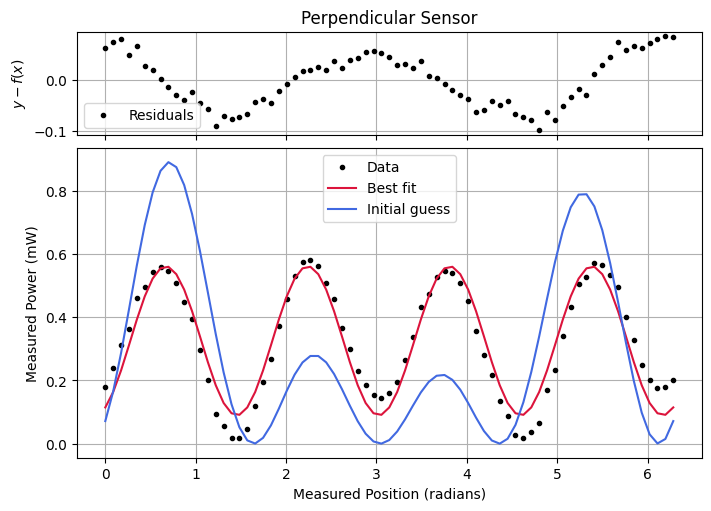

[[Model]]
    Model(fit_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 73
    # variables        = 4
    chi-square         = 0.05152135
    reduced chi-square = 7.4669e-04
    Akaike info crit   = -521.703945
    Bayesian info crit = -512.542107
    R-squared          = 0.91611539
[[Variables]]
    A1:   1.4607e-11 +/- 0.01396017 (95574800028.35%) (init = 0.3)
    A2:   0.49734168 +/- 0.00906368 (1.82%) (init = 0.5)
    C:    0.01979847 +/- 0.00557048 (28.14%) (init = 0)
    phi:  0.23304358 +/- 0.01836492 (7.88%) (init = 0.25)
[[Correlations]] (unreported correlations are < 0.100)
    C(A2, C) = -0.8186


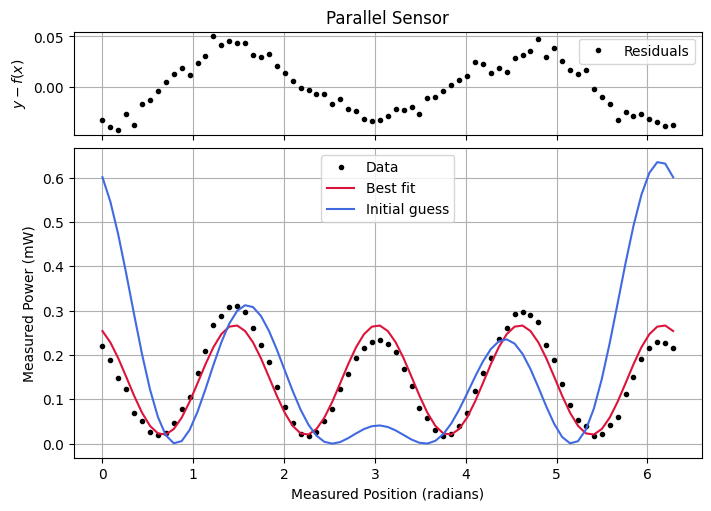

In [21]:
if __name__ == "__main__":
	main()